In [1]:
from gensim.models import word2vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

/usr/local/lib/python3.7/site-packages/smart_open/ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rijulsingh/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#  Data Preparation

In [46]:

stopw = set(stopwords.words('english'))

In [47]:
def readfile(file):
    f=open(file,'r',encoding='utf8')
    text=f.read()
    #Tokenization
    sentences=nltk.sent_tokenize(text)
    print(len(sentences))
    
    data=[]
    
    for sent in sentences:
        words=nltk.word_tokenize(sent)
        words=[w.lower() for w in words if len(w)>2 and w not in stopw]
        data.append(words)
        
        
    return data

In [48]:
text = readfile("./Downloads/hi.txt")
print(text)

37
[['vicky', 'kaushal', 'shares', 'adorable', 'childhood', 'pic', 'wins', 'hearts', 'hilarious', 'caption.after', 'glowing', 'success', 'raazi', 'uri', 'the', 'surgical', 'strike', 'vicky', 'kaushal', 'become', 'hot', 'favourite', 'bollywood'], ['while', 'professional', 'life', 'continues', 'make', 'headlines', 'much', 'attention', 'focussed', 'personal', 'life', 'specific', 'relationship', 'girlfriend', 'harleen', 'sethi'], ['however', 'came', 'light', 'day', 'unfollowed', 'instagram'], ['rumours', 'started', 'rounds', 'katrina', 'kaif', 'reason', 'called', 'quits'], ['mahesh', 'bhatt', 'shot', 'magazine', 'cover', 'daughter', 'pooja', 'bhatt', 'kissed'], ['this', 'picture', 'thumped', 'fans', 'became', 'much-discussed', 'story', 'town'], ['pooja', "n't", 'daughter', 'love', 'marry', 'said', 'bhatt', 'thus', 'adding', 'fuel', 'fire'], ['before', 'release', 'bajrangi', 'bhaijaan', 'kareena', 'kapoor', 'photograph', 'morphed', 'used', 'cover', 'vhp', 'magazine', 'himalaya', 'dhwani', '

In [49]:
stopw

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# Create model

In [50]:
import gensim
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

In [51]:
model=Word2Vec(text,size=300,window=10,min_count=1)
print(model)

Word2Vec(vocab=344, size=300, alpha=0.025)


In [52]:
words=list(model.wv.vocab)
print(words)

['vicky', 'kaushal', 'shares', 'adorable', 'childhood', 'pic', 'wins', 'hearts', 'hilarious', 'caption.after', 'glowing', 'success', 'raazi', 'uri', 'the', 'surgical', 'strike', 'become', 'hot', 'favourite', 'bollywood', 'while', 'professional', 'life', 'continues', 'make', 'headlines', 'much', 'attention', 'focussed', 'personal', 'specific', 'relationship', 'girlfriend', 'harleen', 'sethi', 'however', 'came', 'light', 'day', 'unfollowed', 'instagram', 'rumours', 'started', 'rounds', 'katrina', 'kaif', 'reason', 'called', 'quits', 'mahesh', 'bhatt', 'shot', 'magazine', 'cover', 'daughter', 'pooja', 'kissed', 'this', 'picture', 'thumped', 'fans', 'became', 'much-discussed', 'story', 'town', "n't", 'love', 'marry', 'said', 'thus', 'adding', 'fuel', 'fire', 'before', 'release', 'bajrangi', 'bhaijaan', 'kareena', 'kapoor', 'photograph', 'morphed', 'used', 'vhp', 'himalaya', 'dhwani', 'publish', 'warning', "'love-jihad", 'among', 'people', 'actress', 'hired', 'two', 'bodyguards', 'precautio

In [53]:
print(model["deepika"].shape)

(300,)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


# Create Analogies

In [54]:
def predict_actor(a,b,c,word_vectors):
    """Accepts a triad of words and returns d such that a is to b :: c is to d"""
    a,b,c=a.lower(),b.lower(),c.lower()
    
    max_similarity= -100
    
    d = None
    
    wa,wb,wc=word_vectors[a],word_vectors[b],word_vectors[c]
    
    options=["vicky","deepika","singh","padukone","ranveer","virat","jonas","chopra","anushka","priyanka","nick","sanjay","madhuri"]
    
    for w in options:
        if w in [a,b,c]:
            continue
        wv=word_vectors[w]
        
        sim=cosine_similarity([wb-wa],[wv-wc])
        
        if sim > max_similarity:
            max_similarity = sim
            d = w
            
    return d

# Test your model

In [56]:
triad=("ranveer","deepika","virat")
predict_actor(*triad,model.wv)

'anushka'

In [58]:
triad=("virat","anushka","priyanka")
predict_actor(*triad,model.wv)

'nick'

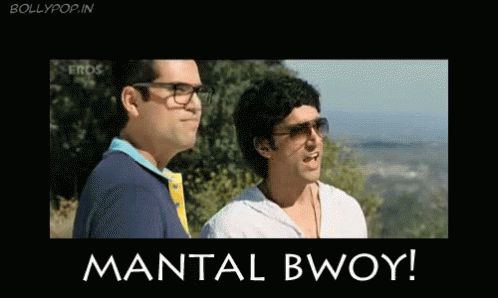

In [76]:
with open('./Documents/mantal.gif','rb') as f:
    display(Image(data=f.read(), format='png'))